In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from plotting import plotTF, plotTFs
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']

In [2]:
Data = np.loadtxt('NFSS_BOFF_INLOOP_EXC_over_OUT2_16-08-2019_123502.txt')
Data2 = np.loadtxt('NFSS_BON_INLOOP_EXC_over_OUT2_16-08-2019_124100.txt')

In [3]:
ff = Data[:,0]
Meas = Data[:,1]*np.exp(1j*Data[:,2]*np.pi/180)
G1=-392/124          #Gain of stage across which OUT1 and OUT2 are present
G2=-392/1.2e3        #Gain of excitation signal in the same stage
Gol = 1 - G2*Meas    #Measurement was taken by EXC/OUT2

ff2 = Data2[:,0]
Meas2 = Data2[:,1]*np.exp(1j*Data2[:,2]*np.pi/180)
G1=-392/124          #Gain of stage across which OUT1 and OUT2 are present
G2=-392/1.2e3        #Gain of excitation signal in the same stage
Gol2 = 1 - G2*Meas2    #Measurement was taken by EXC/OUT2

In [4]:
fug = ff[200+np.argmin(np.abs(np.abs(Gol[200:])-1))]/1e3
fug2 = ff2[200+np.argmin(np.abs(np.abs(Gol2[200:])-1))]/1e3

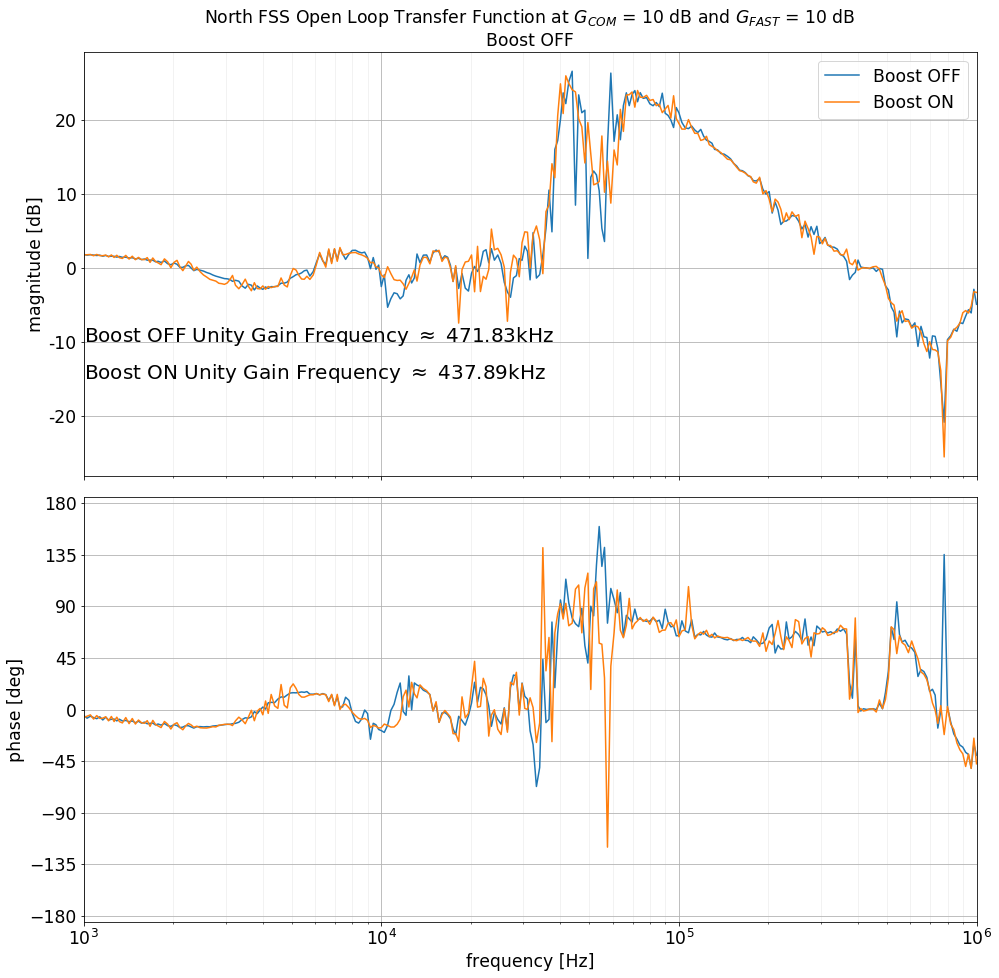

In [5]:
fig = plotTF(ff,Gol,figsize=[16,16],dB=True,label='Boost OFF')
plotTF(ff2,Gol2,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=True,label='Boost ON')
fig.axes[0].set_title('North FSS Open Loop Transfer Function at $G_{COM}$ = 10 dB and $G_{FAST}$ = 10 dB'+
                     '\nBoost OFF')
fig.axes[0].text(1e3,-10,r'Boost OFF Unity Gain Frequency $\approx$ '+str(np.round(fug,2))+ 'kHz',FontSize=20)
fig.axes[0].text(1e3,-15,r'Boost ON Unity Gain Frequency $\approx$ '+str(np.round(fug2,2))+ 'kHz',FontSize=20)
fig.axes[0].legend()
figlist +=[fig]

In [6]:
pp = PdfPages('NFSS_OLTF.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()